In [1]:
import matplotlib

In [2]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

In [3]:
pytrend.build_payload(kw_list=["fuck trump"])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,fuck trump
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


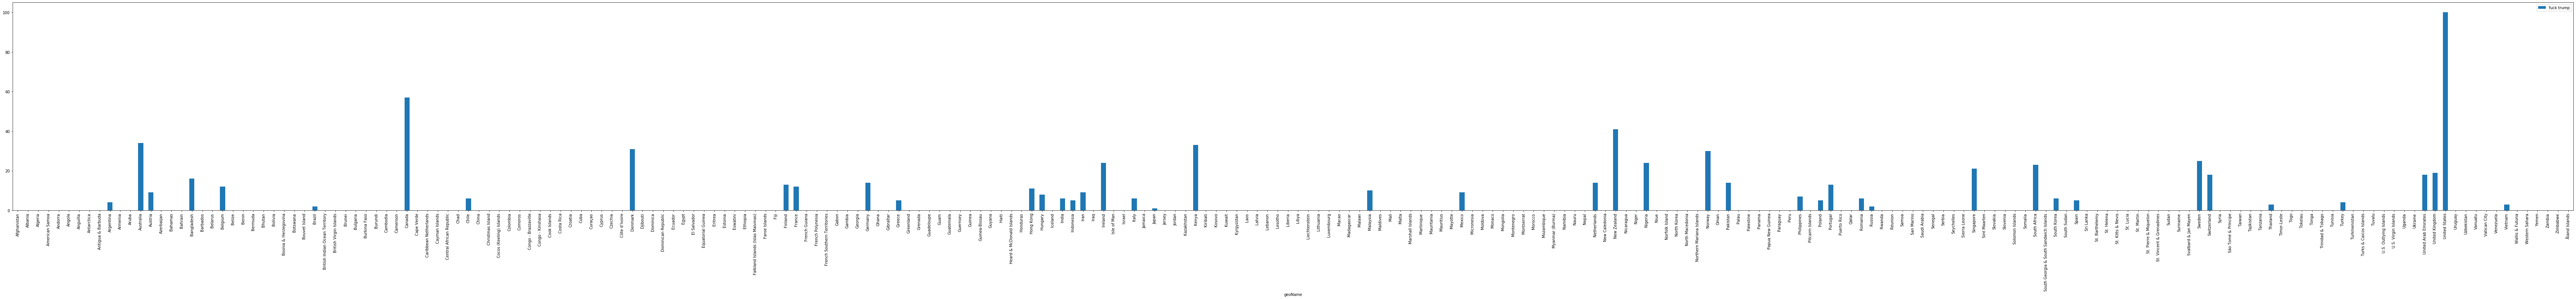

In [4]:
df.reset_index().plot(x="geoName", y="fuck trump", figsize=(120, 10), kind ="bar")

In [ ]:
# Requires pandas. For Windows users, I recommend installing the Anaconda Python distirbution.
# Requires the pytrends library. To install, run "pip install pytrends".
from pytrends.pyGTrends import pyGTrends
# Replace above with pytrends.request import TrendReq
import time
import os
from random import randint
import pandas as pd
 
# Add your Gmail username to the google_username variable and your Gmail password to the google_password variable.
google_username = ""
google_password = ""
connector = pyGTrends(google_username, google_password)
# Replace above with connector = TrendReq(google_username, google_password)
# This script downloads a series of CSV files from Google Trends. Please specify a filepath for where you'd like these files to be stored in the below variable.
path = ""
 
# Specify the filename of a CSV with a list of keywords in the variable, keyordcsv. The CSV should be one column, with header equal to Keywords (case sensitive).
keywordcsv = "keywords.csv"
keywords = pd.read_csv(keywordcsv)
 
# Downloads and Calculate Slope:
keywordlist = pd.DataFrame(columns=["keyword","slope"])
for index, row in keywords.iterrows():
    print("Downloading Keyword #" + str(index))
    payload = {'geo': 'US', 'q': [row[0]]}
    connector.request_report(payload)
    time.sleep(randint(5, 10))
    connector.save_csv(path, str(index))
    csvname = str(index)+".csv"
    trenddata = pd.read_csv(csvname, skiprows=4, names=['date', 'values'])
    keyword = trenddata['values'].loc[[0]][0]
    trenddata = trenddata.ix[1:]
    trenddata['keyword'] = keyword
    trenddata.rename(columns={'values': 'trends'}, inplace=True)
    trenddata['trends'] = pd.to_numeric(trenddata['trends'], errors='coerce')
    trenddata['date'] = trenddata['date'].str.extract('(^[0-9]{4}\-[0-9]{2}\-[0-9]{2}) \-.*')
    trenddata = trenddata.dropna()
    trenddata['date'] = pd.to_datetime(trenddata['date'])
    trenddata['year'] = pd.DatetimeIndex(trenddata['date']).year
    trenddata['month'] = pd.DatetimeIndex(trenddata['date']).month
    trenddata['day'] = pd.DatetimeIndex(trenddata['date']).day
 
    maxyear = trenddata['year'].max()
    grouped = trenddata.groupby(['year']).mean()
 
    def slope_formula(xone, yone, xtwo, ytwo):
        return (ytwo-yone)/(xtwo-xone)
 
    maxyear = trenddata['year'].max()
    grouped = trenddata.groupby(['year']).mean()
    slope = slope_formula(1,float(grouped.loc[grouped.index==maxyear-2]['trends']),
                          2,float(grouped.loc[grouped.index==maxyear-1]['trends']))
    keywordlist = keywordlist.append({'keyword':keyword,'slope':slope}, ignore_index=True)
    os.remove(csvname)
 
# Specify a csv filename to output the slope values.
keywordlist.to_csv("trends_slope.csv", sep=",", encoding="utf-8", index=False)
 
print("Slope calculation and CSV export complete.")